In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

books = pd.read_csv('final.csv', index_col=0)
books.drop(['Read Status'], axis=1, inplace=True)
books

,Title,Authors,Contributors,Last Date Read,Moods,Pace,Character- or Plot-Driven?,Strong Character Development?,Loveable Characters?,Diverse Characters?,Flawed Characters?,sizes,genre,Star Rating
0,The Wind-Up Bird Chronicle,Haruki Murakami,Jay Rubin,2018-01-01,reflective,slow,Character,No,It's complicated,No,It's complicated,long,literary,2.50
1,The Toll,Neal Shusterman,Missing,2019-12-04,adventurous,medium,A mix,Yes,Yes,Yes,Yes,long,sci-fi,4.00
2,Transcendent Kingdom,Yaa Gyasi,Missing,2022-04-10,emotional,medium,Character,Yes,Yes,Yes,Yes,medium,literary,4.00
3,Hollow City,Ransom Riggs,Missing,2020-03-05,adventurous,medium,A mix,Yes,Yes,Yes,No,medium,fantasy,3.75
4,The Astonishing Color of After,Emily X.R. Pan,Missing,2020-01-20,emotional,medium,Character,Yes,Yes,Yes,Yes,medium,contemporary,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Truly Devious,Maureen Johnson,Missing,2020-03-02,mysterious,medium,Plot,Yes,It's complicated,Yes,Yes,medium,thriller,3.00
446,Domniṣoara Christina,Mircea Eliade,Missing,2018-01-01,mysterious,medium,Plot,No,It's complicated,No,No,short,classics,4.00
447,Into the Drowning Deep,Mira Grant,Missing,2019-01-01,dark,medium,Plot,Yes,Yes,Yes,No,medium,horror,3.75
448,Down Among the Sticks and Bones,Seanan McGuire,Missing,2019-01-01,dark,fast,A mix,Yes,Yes,Yes,Yes,short,fantasy,5.00


In [145]:
books.isnull().any()

Title                            False
Authors                          False
Contributors                     False
Last Date Read                   False
Moods                            False
Pace                             False
Character- or Plot-Driven?       False
Strong Character Development?    False
Loveable Characters?             False
Diverse Characters?              False
Flawed Characters?               False
sizes                            False
genre                            False
Star Rating                      False
dtype: bool

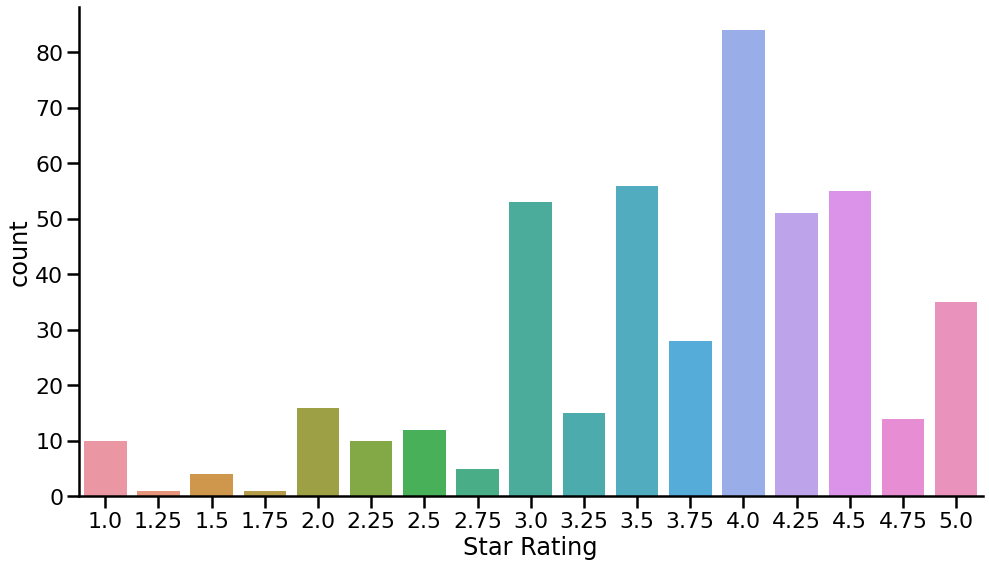

In [146]:
sns.catplot(data = books, x = 'Star Rating', kind = 'count')
plt.gcf().set_size_inches(20, 10)
plt.show()

As we can see, my ratings are mostly between 3.5 and 4.5 stars, with the vast majority being 4 stars. Given the low amount of 
low rated books, we can group them and hopefully get a less skewed distribution.

In [147]:
ratings = {1.0: [1.0, 1.25, 1.50], 2.0: [1.75, 2.0, 2.25, 2.50], 3.0: [2.75, 3.0, 3.25], 3.50: [3.50, 3.75],
                 5.0: [4.50, 4.75, 5.0]}

def update_ratings():
    for k, v in ratings.items():
        for i in v:
            books.loc[books['Star Rating'] == i, 'Star Rating'] = k
    return books['Star Rating']

update_ratings()

0      2.0
1      4.0
2      4.0
3      3.5
4      5.0
      ... 
445    3.0
446    4.0
447    3.5
448    5.0
449    3.5
Name: Star Rating, Length: 450, dtype: float64

In [148]:
books['Star Rating'].value_counts()

5.00    104
3.50     84
4.00     84
3.00     73
4.25     51
2.00     39
1.00     15
Name: Star Rating, dtype: int64

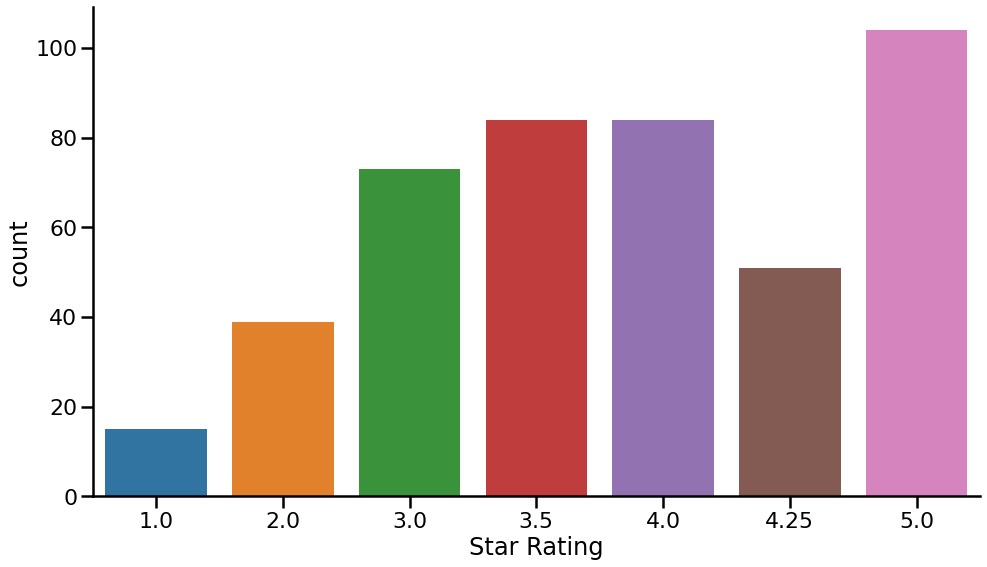

In [149]:
sns.catplot(data = books, x = 'Star Rating', kind = 'count')
plt.gcf().set_size_inches(20, 10)
plt.show()

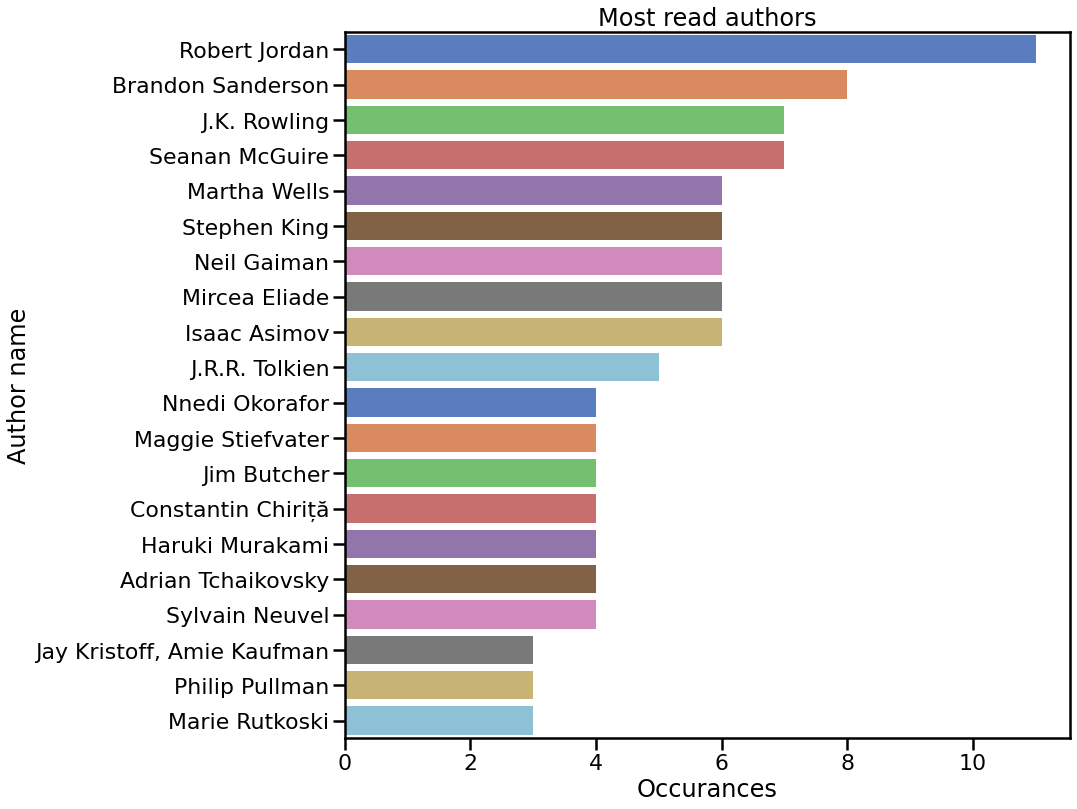

In [150]:
sns.set_context('poster')
plt.figure(figsize = (13, 13))
author = books['Authors'].value_counts()[:20]
sns.barplot(x = author, y = author.index, palette = 'muted')
plt.title('Most read authors')
plt.xlabel('Occurances')
plt.ylabel('Author name')
plt.show()

Most read authors indicate a preference for fantasy and sci-fi books and for popular series(Robert Jordan - Wheel of time, etc).
As for the authors who have only written stand-alone books, but who are featured here, their presence might indicate that the
author might be a personal favourite.

In [151]:
cols = ['Moods', 'Pace', 'Character- or Plot-Driven?', 'Strong Character Development?', 'Loveable Characters?',
       'Diverse Characters?', 'Flawed Characters?', 'sizes', 'genre']

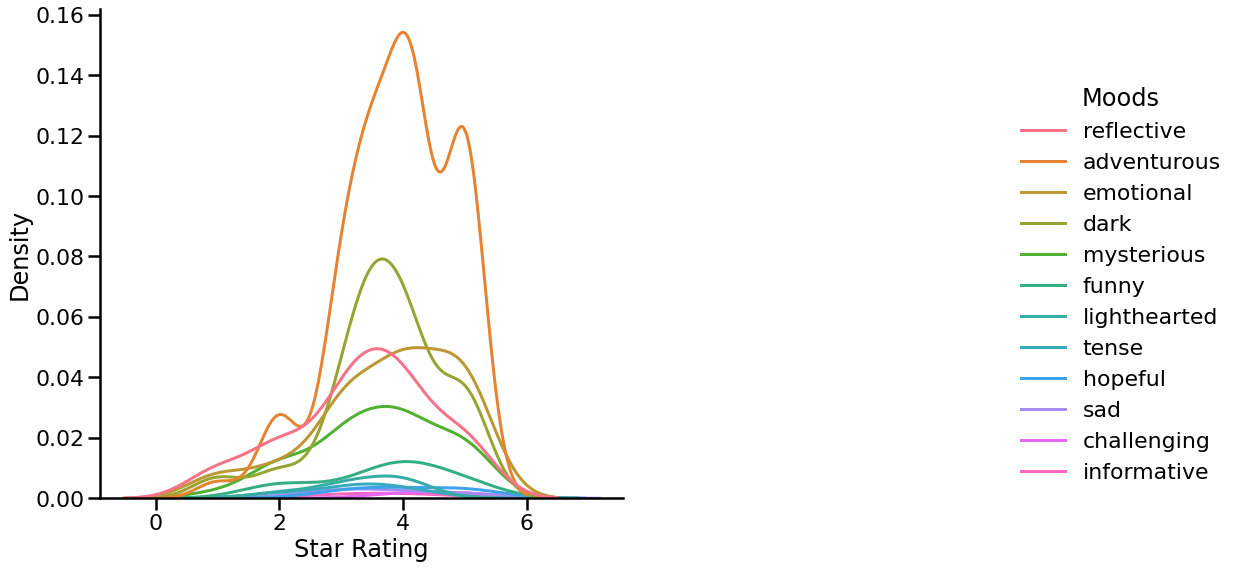

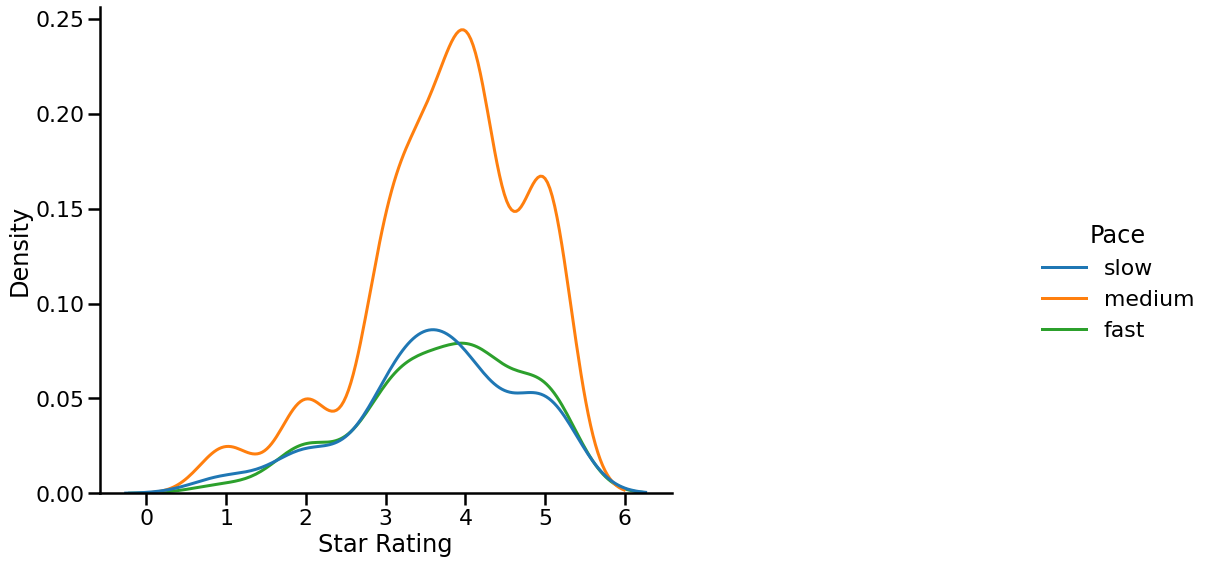

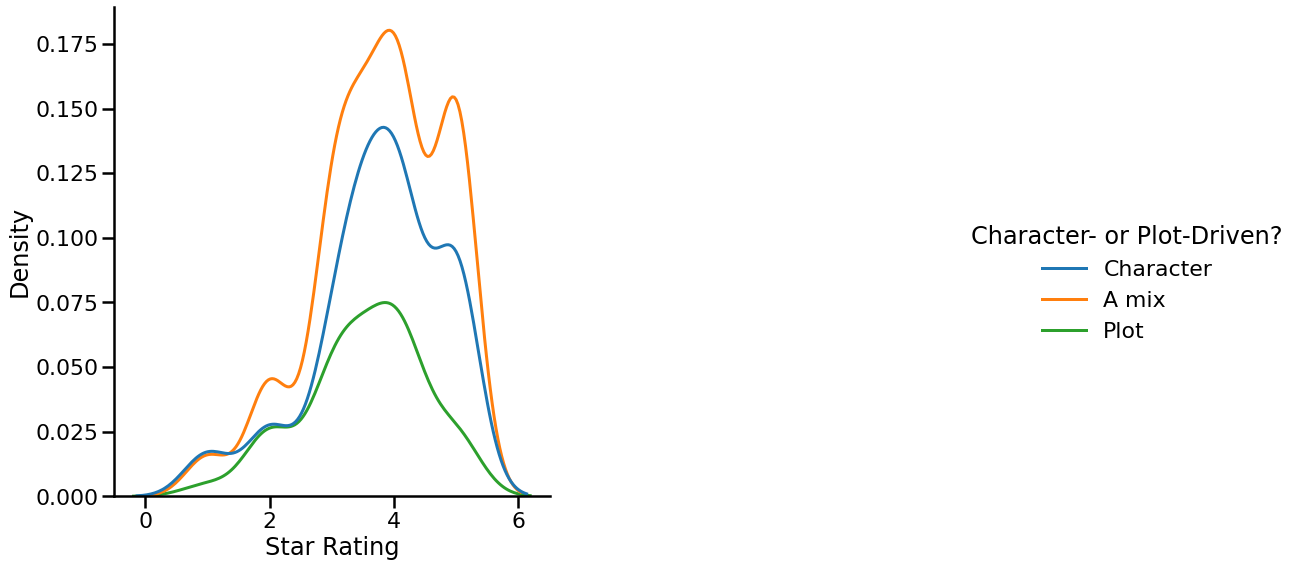

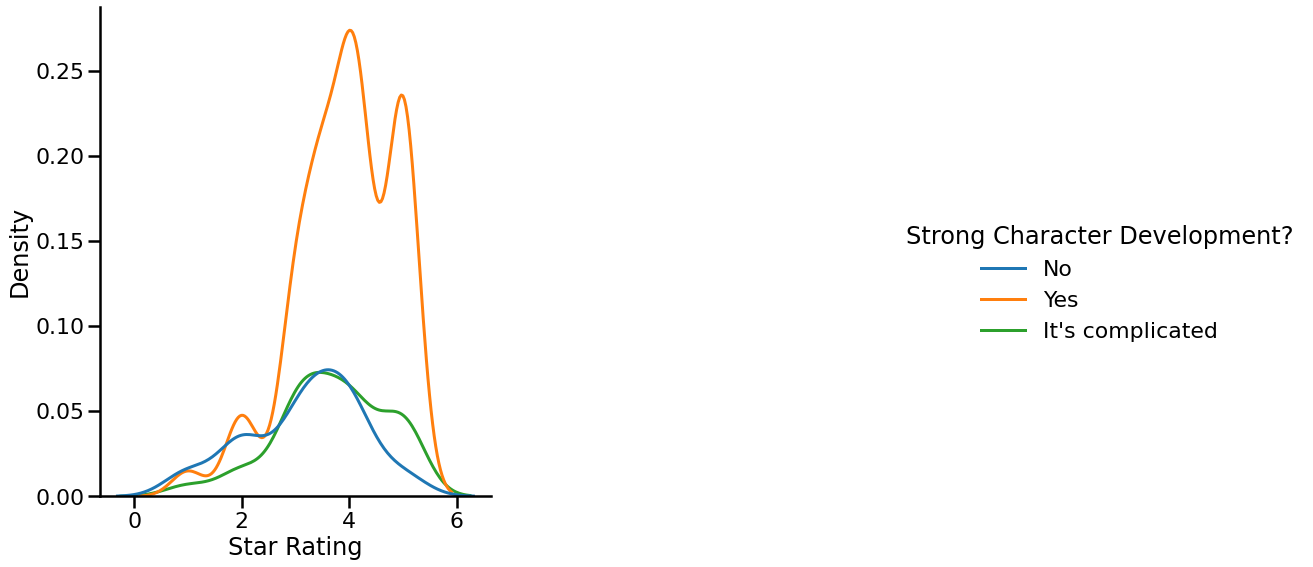

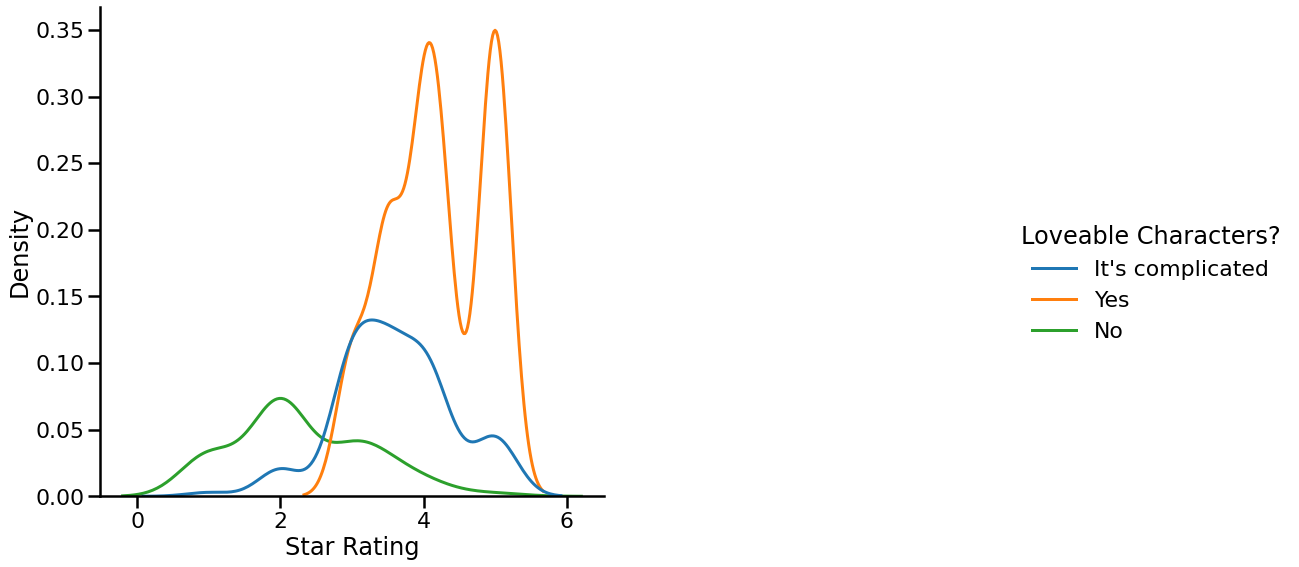

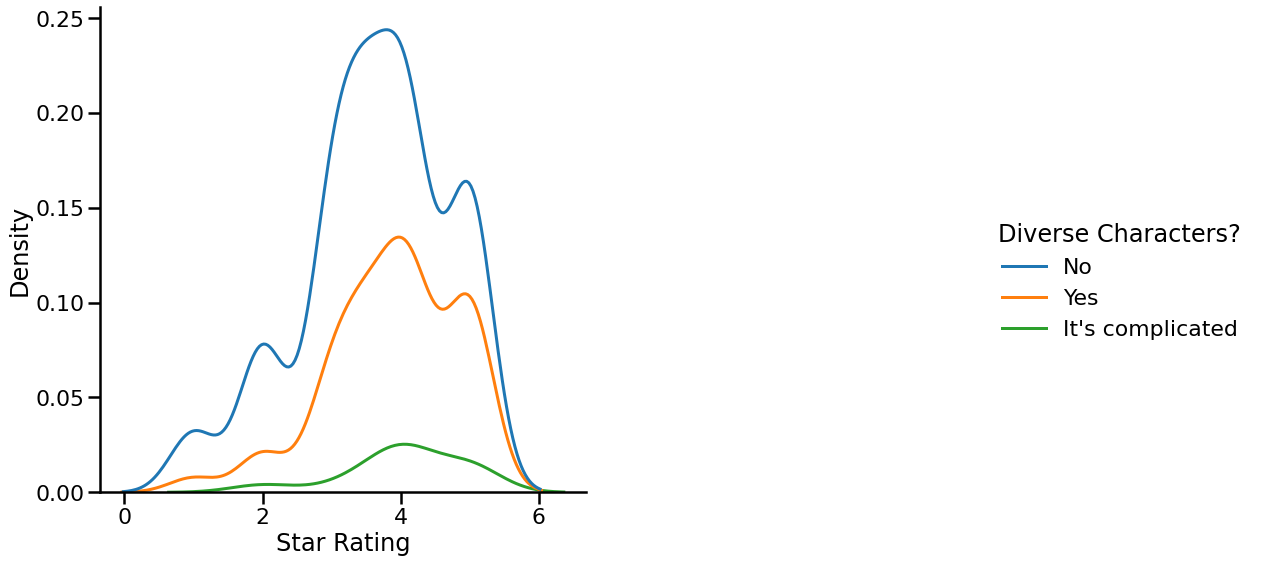

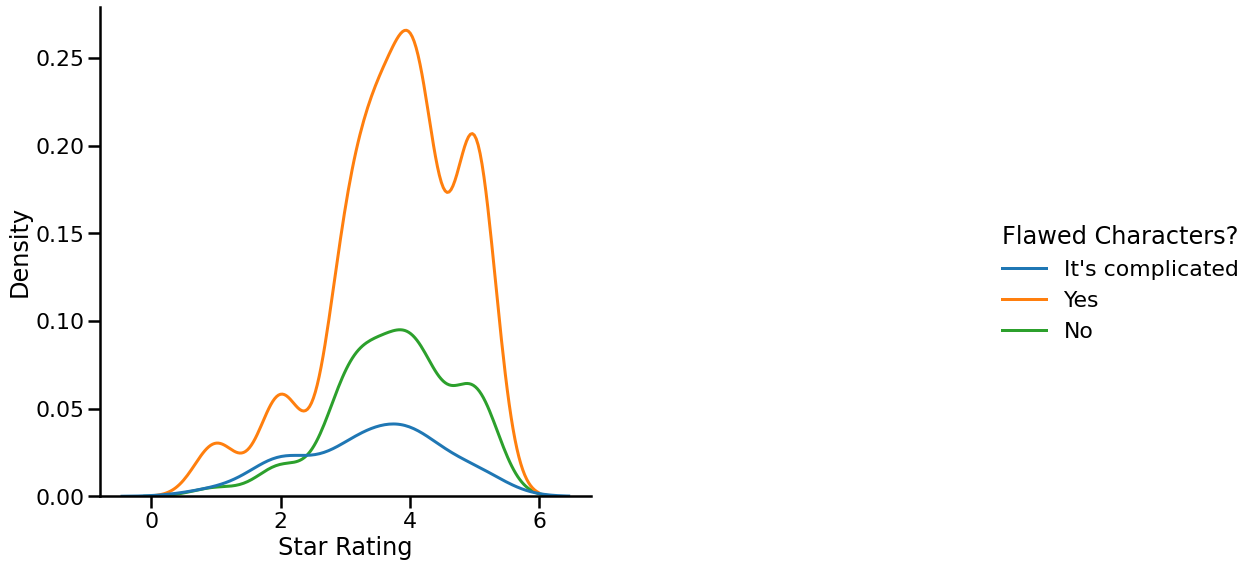

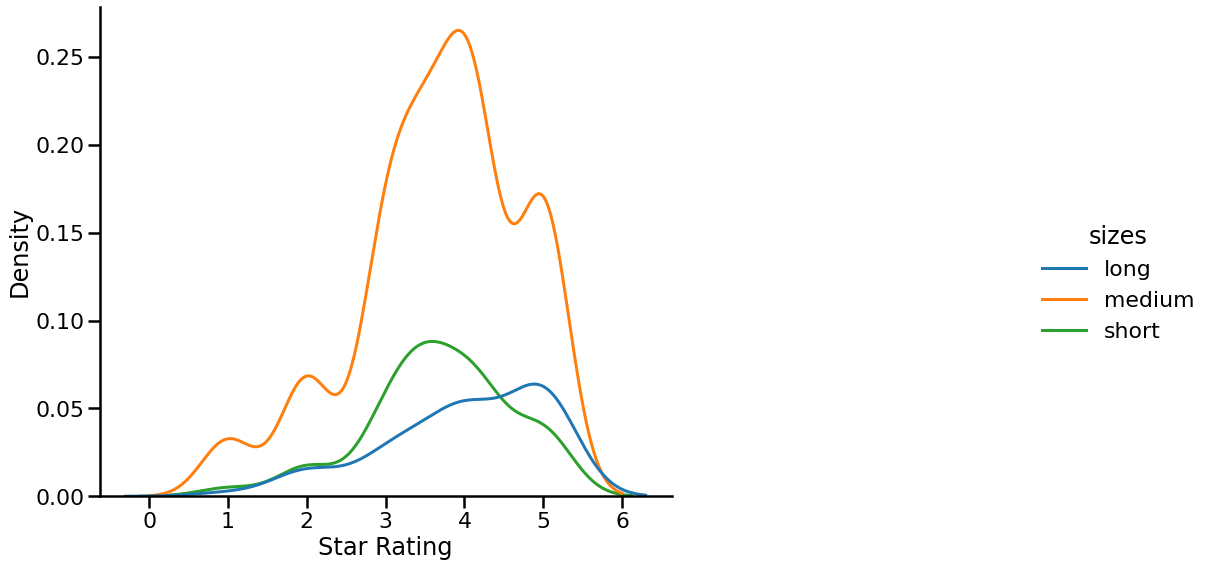

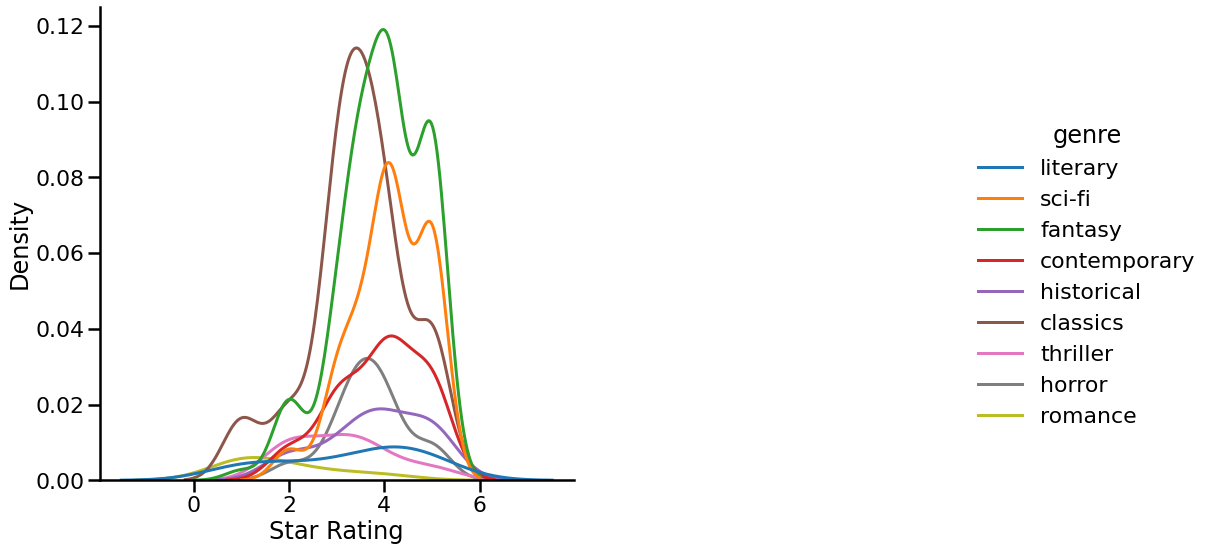

In [152]:
for i in cols:
    sns.displot(data = books, x = 'Star Rating', hue = i, kind = 'kde')
    plt.gcf().set_size_inches(20, 10)
    plt.show()

<Figure size 864x864 with 0 Axes>

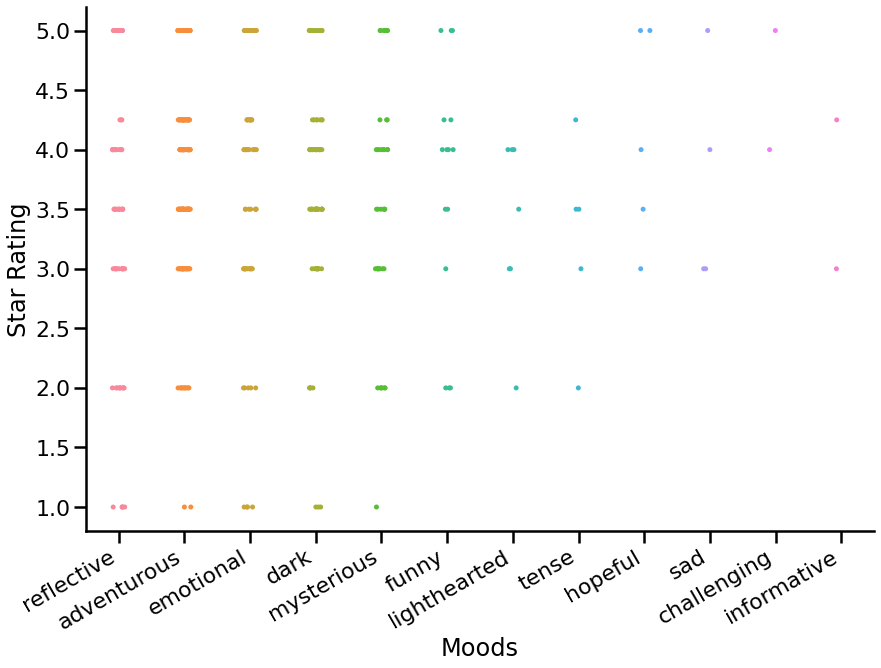

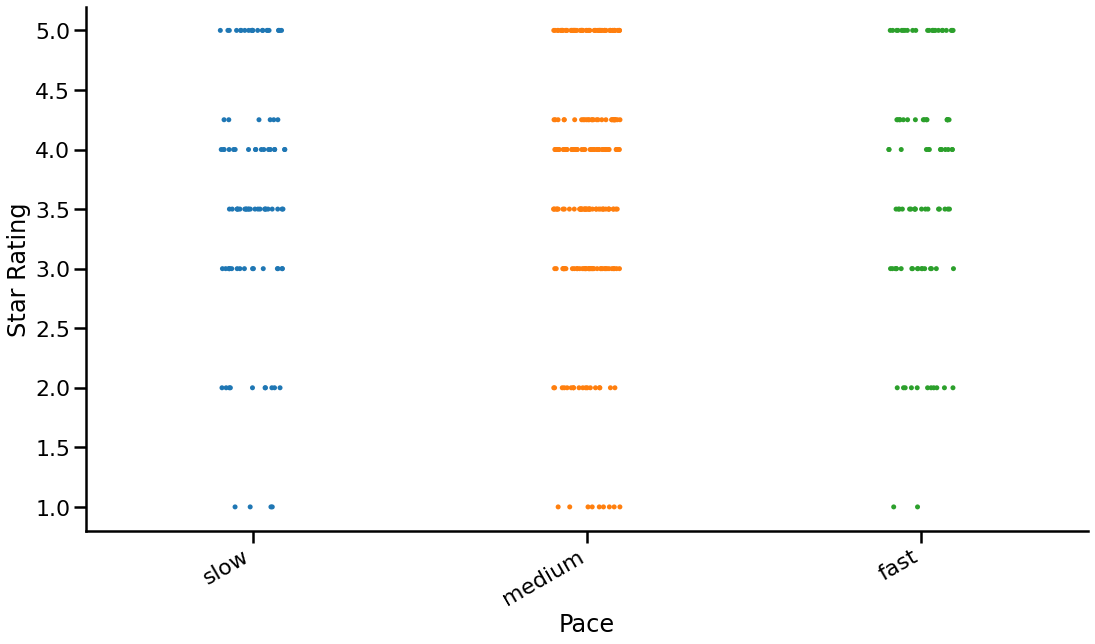

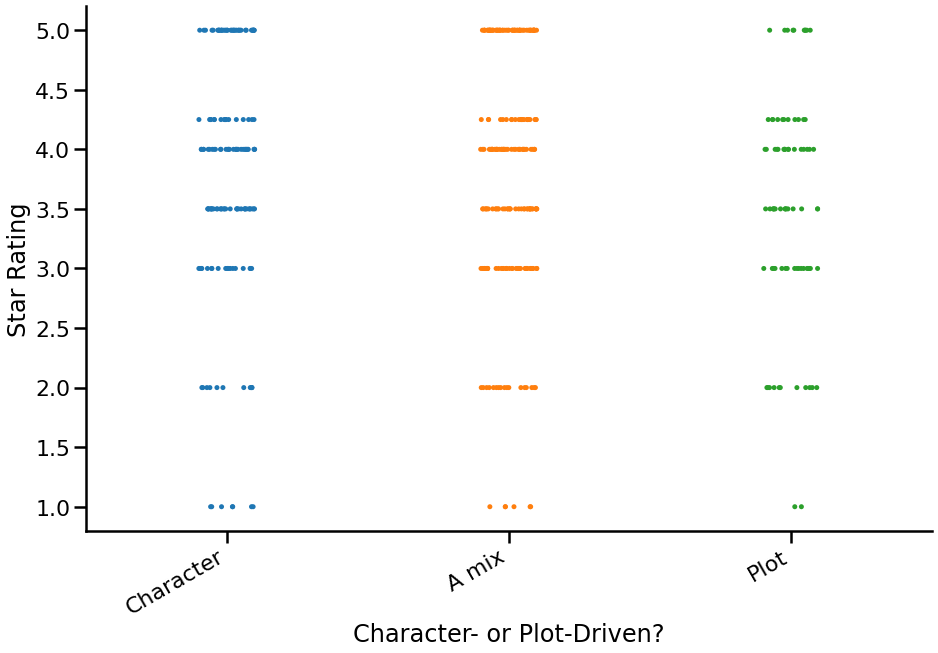

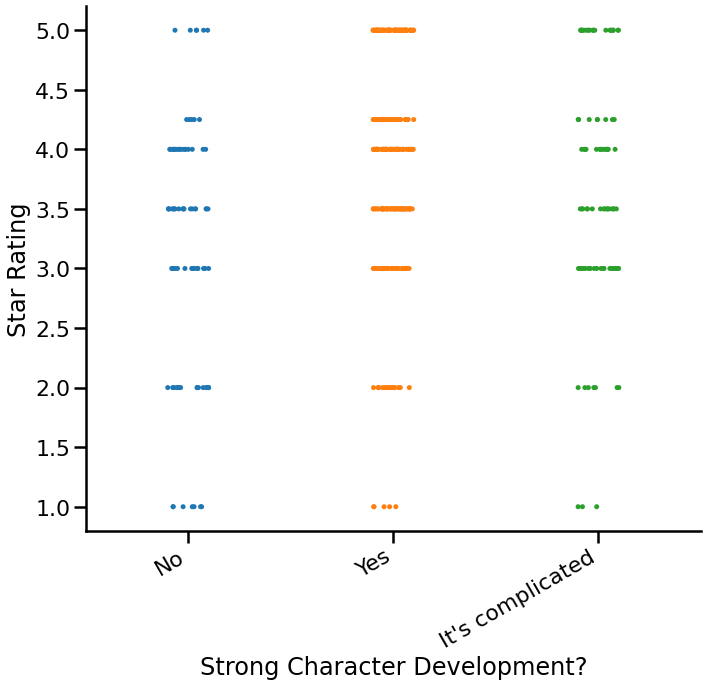

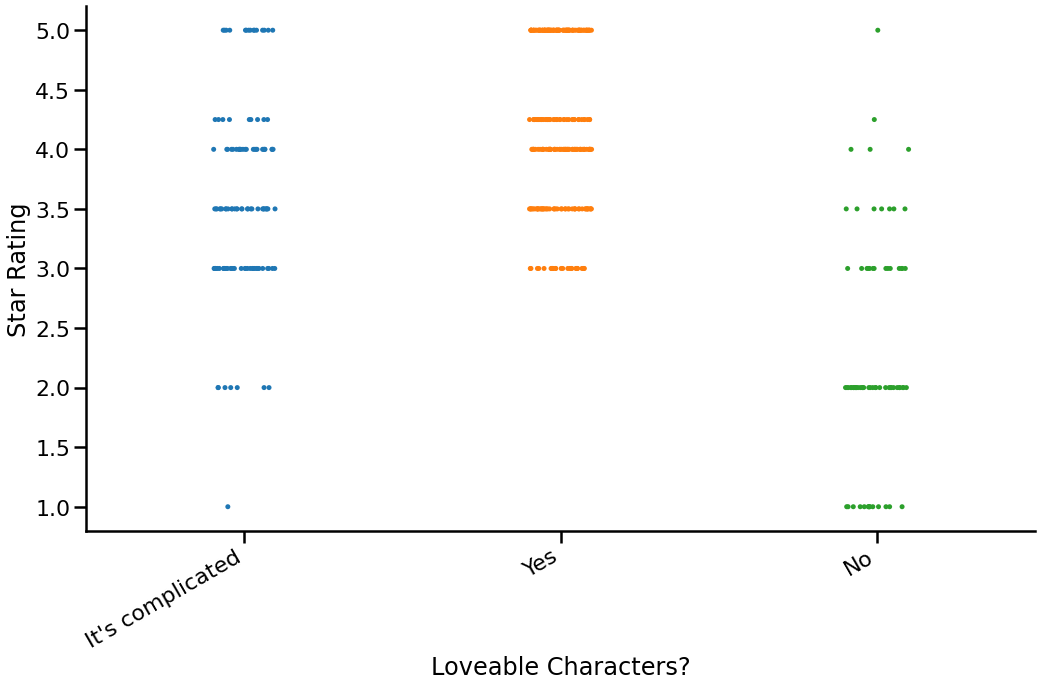

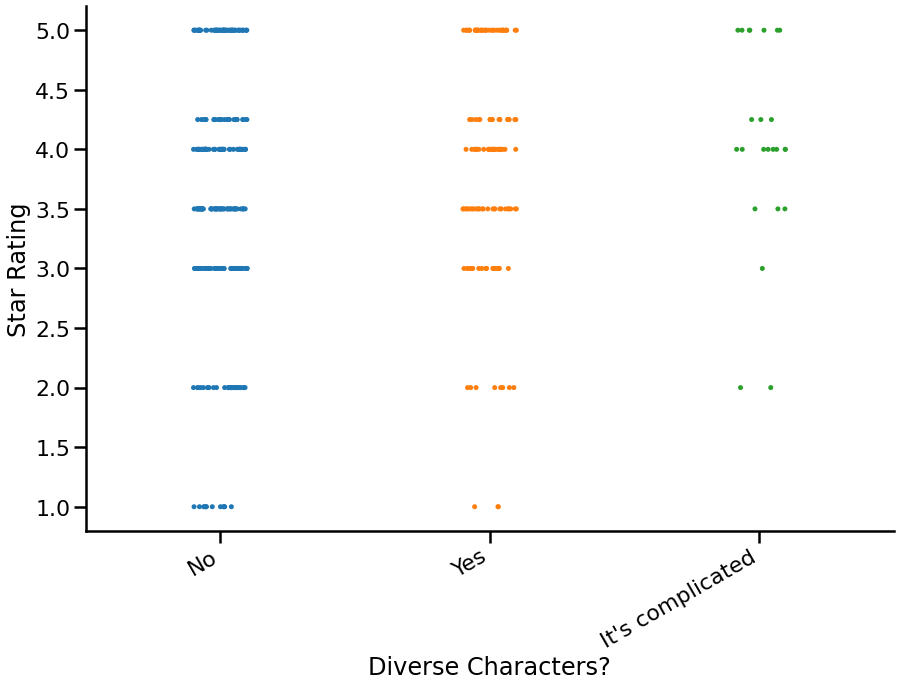

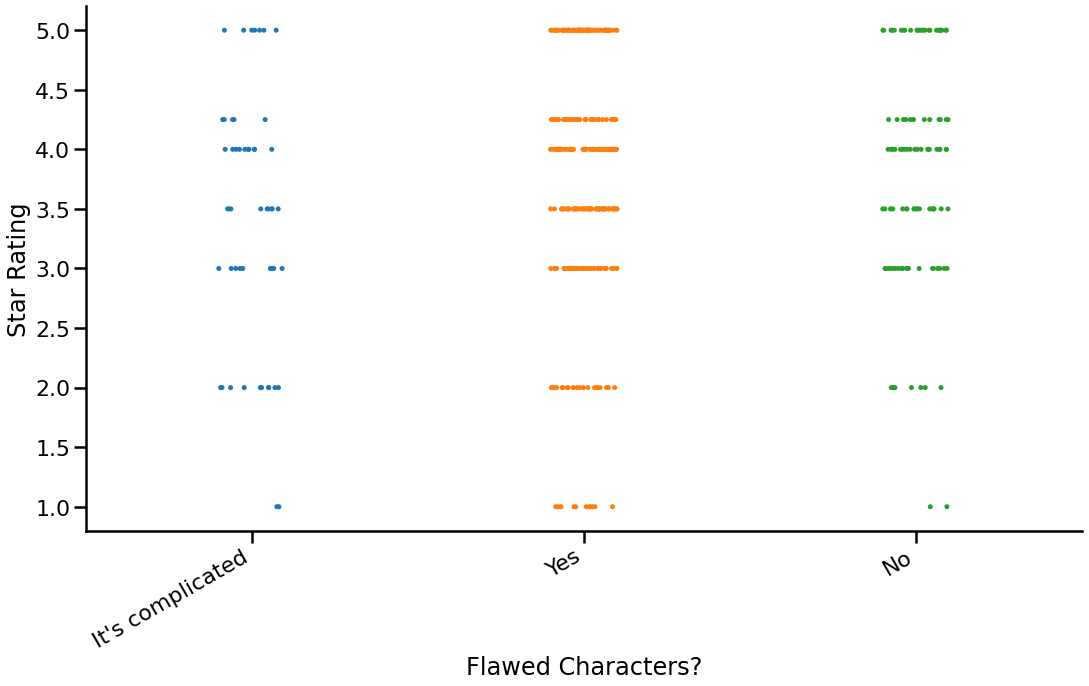

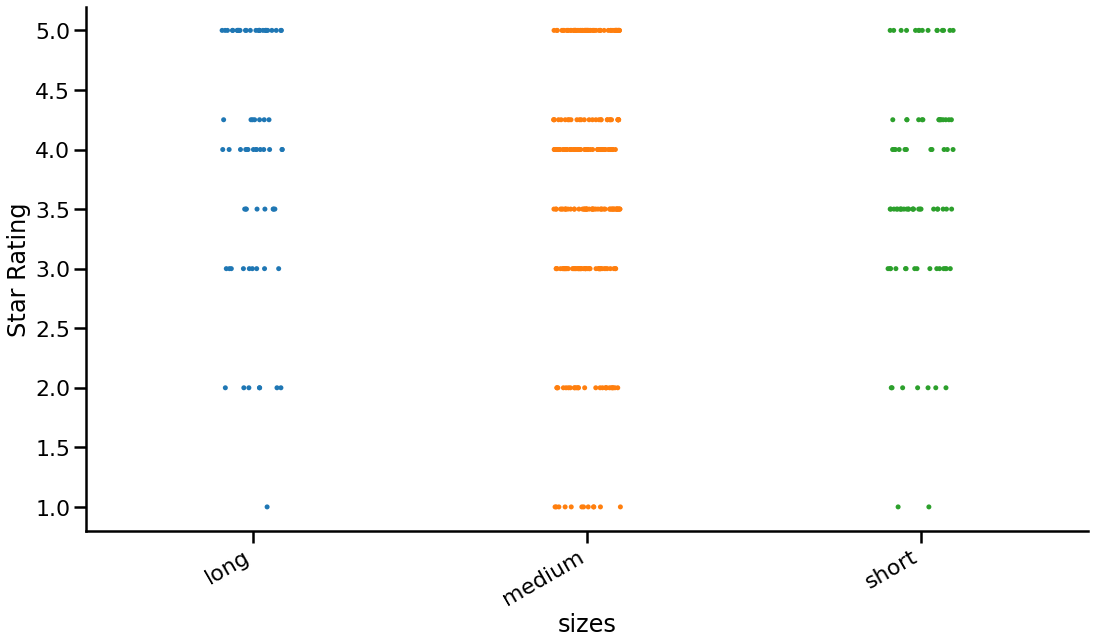

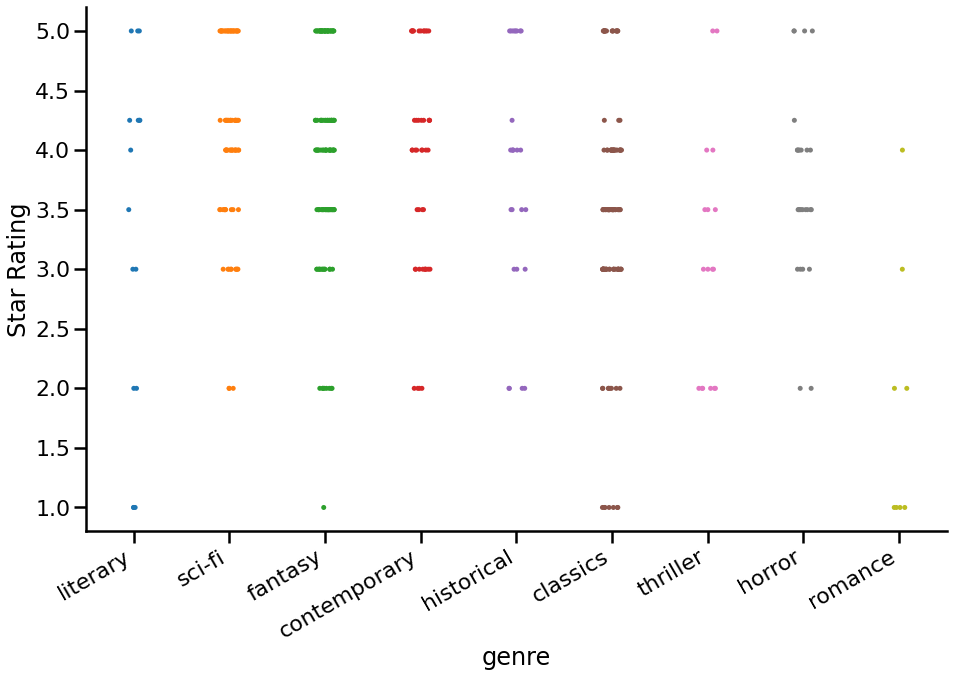

In [153]:
fig = plt.figure()
for i in cols:
    sns.catplot(data = books, x = i, y = 'Star Rating')
    plt.gcf().set_size_inches(20, 10)
    plt.gcf().autofmt_xdate()
    plt.show


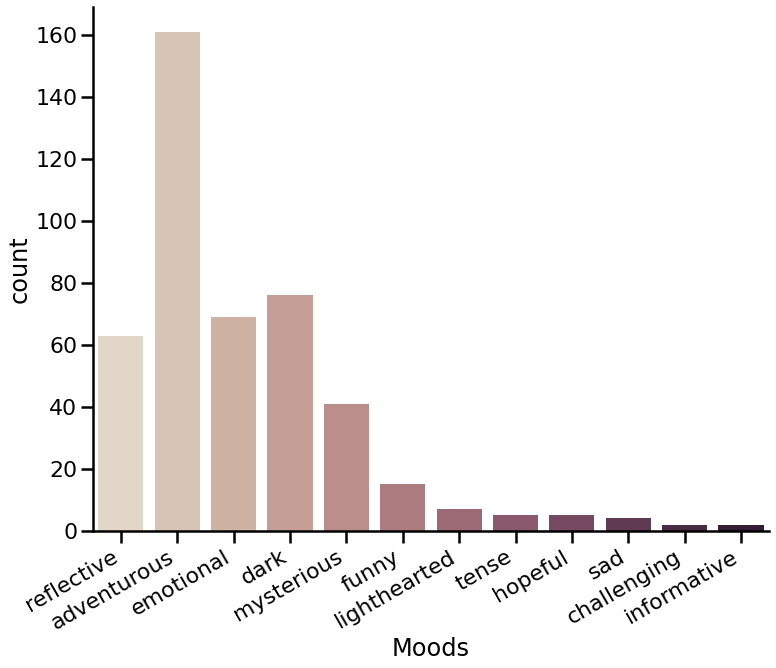

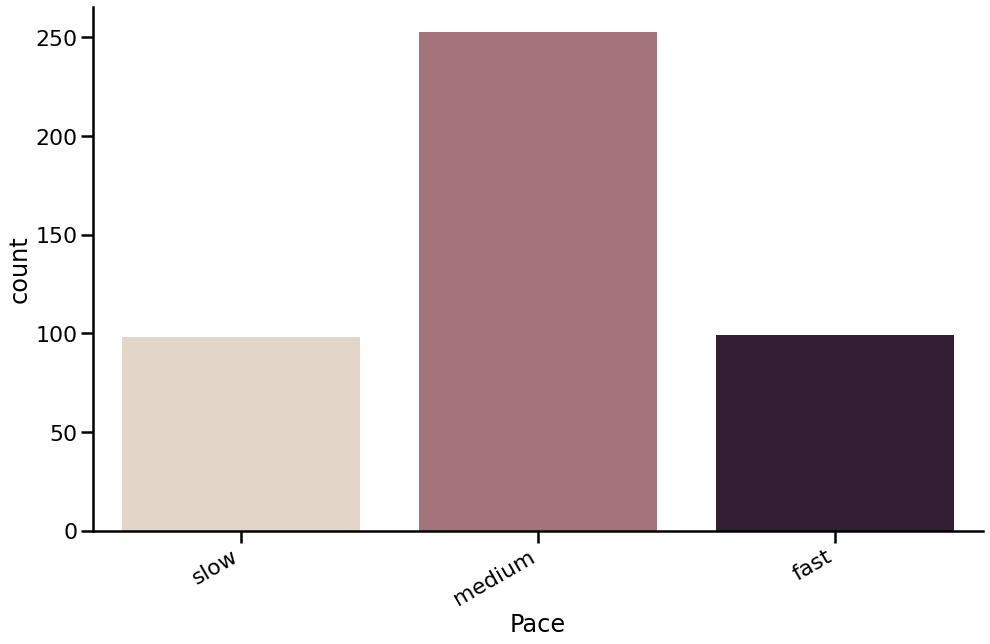

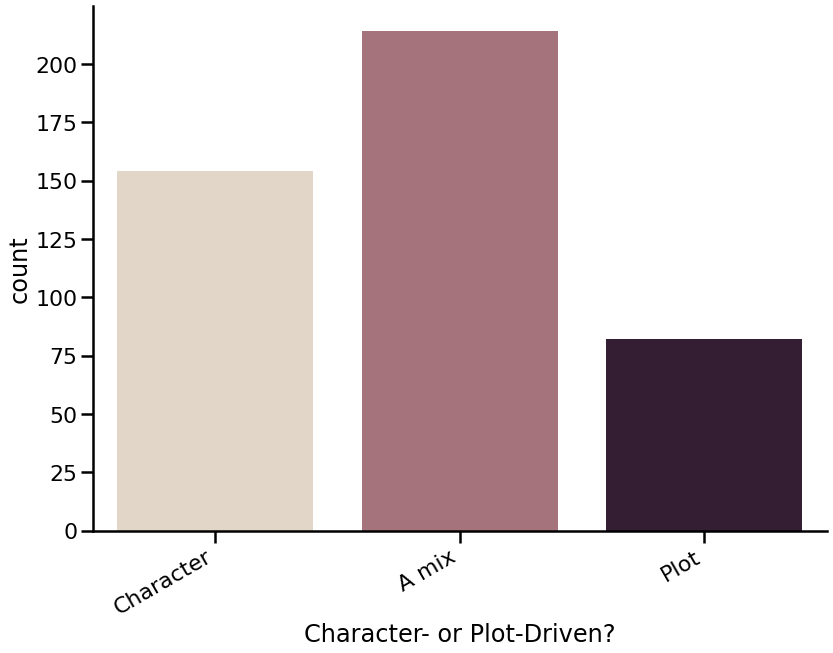

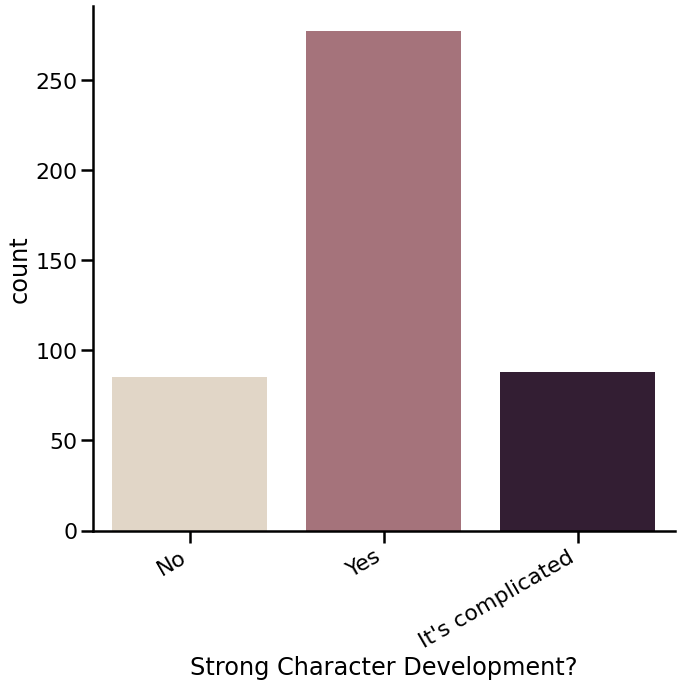

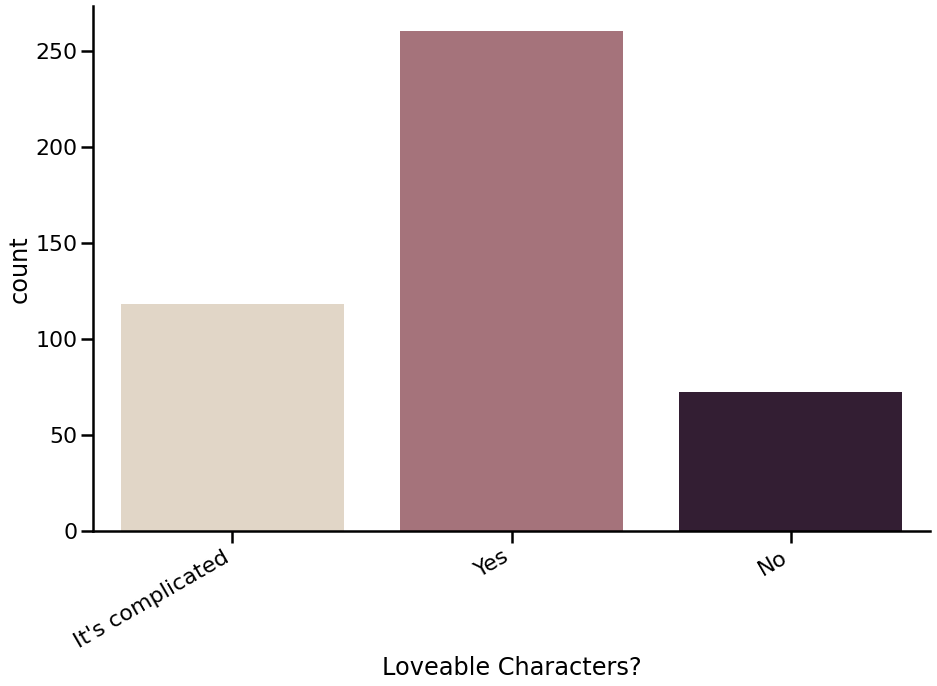

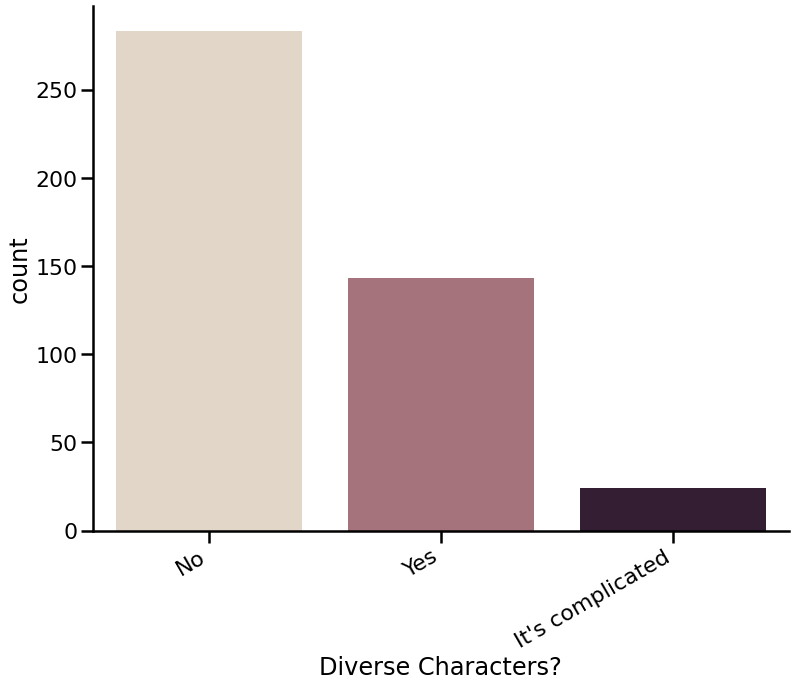

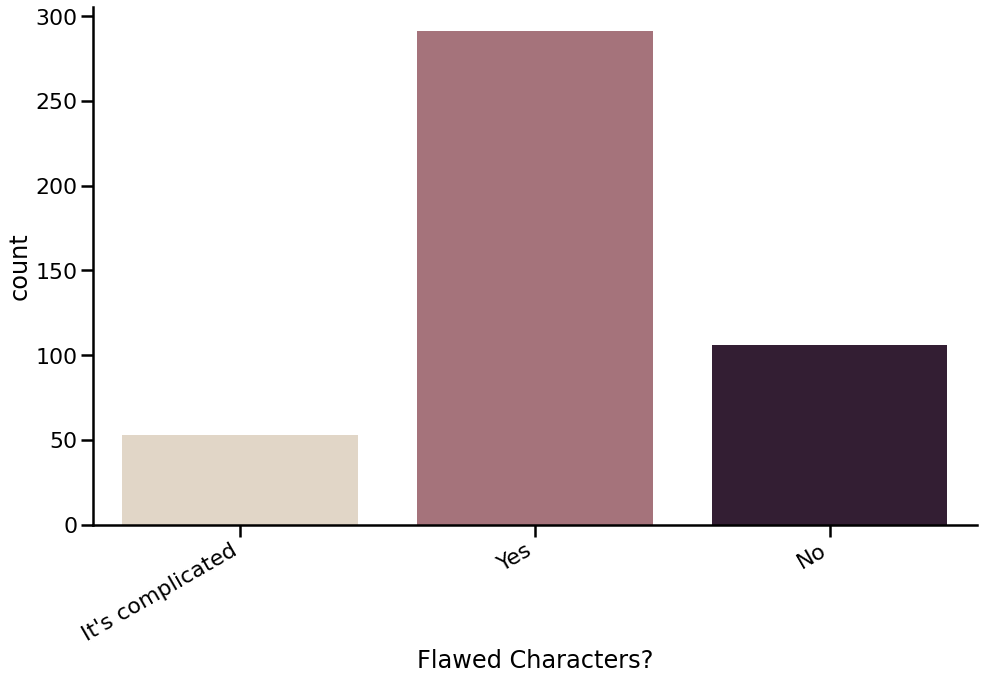

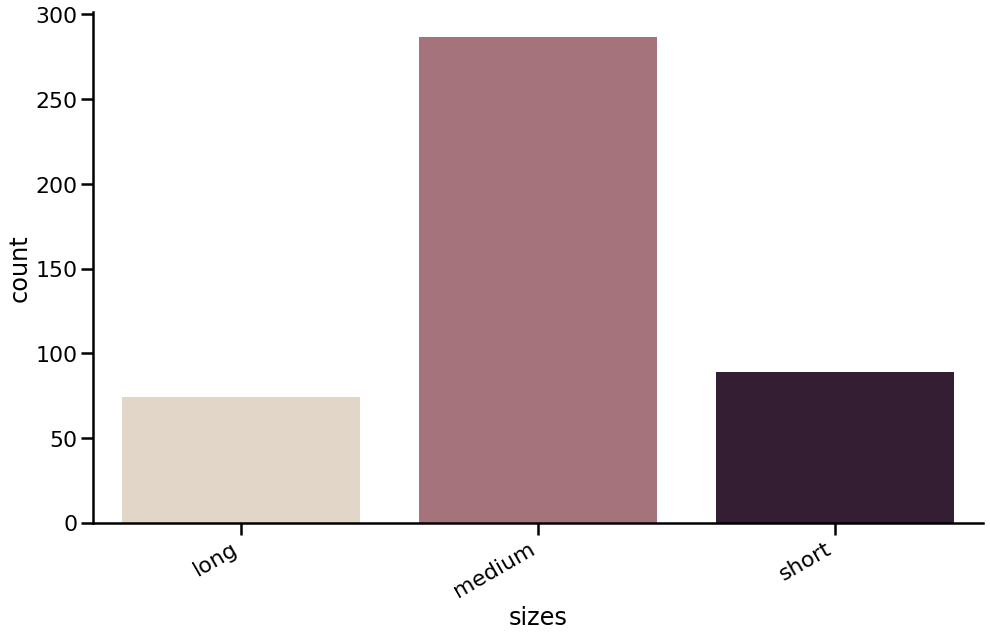

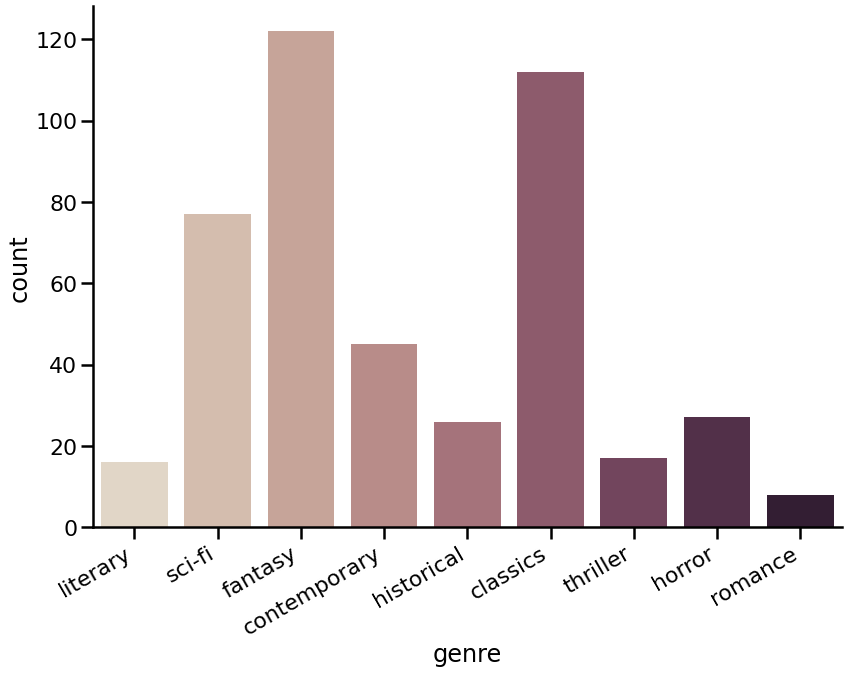

In [154]:
for i in cols:
    sns.catplot(data=books, x=i, kind='count', palette='ch:.25')
    plt.gcf().set_size_inches(20, 10)
    plt.gcf().autofmt_xdate()
    plt.show()

We can make a pretty detailed profile of the reader and figure out the reading preferences. This was the main purpose of 
this project, to use data visualization to help me choose, in a more informed manner, what books to read based on the type
of books I tend to like. And while I know my reading preferences quite well, it’s interesting to see a visualization that 
confirms or denies certain assumptions. For example: you can tell that I tend to read books that are adventurous, emotional
    or reflective, that a medium-paced book with a lot of focus on the characters or with a balance between characters and 
    plot would be the best choice for me. Strong character development is a must, as books with strong character development
    have been rated high. In terms of genre, there is a preference for classics, fantasy and sci-fi. 